In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

## Clase de matemáticas

In [2]:
math_df = pd.read_csv('student-mat.csv')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
math_df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [5]:
math_df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

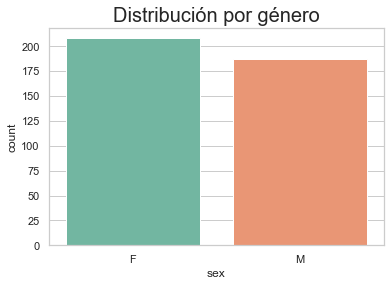

In [6]:
# distribución por género
sns.countplot(x='sex', data=math_df)
plt.title('Distribución por género', fontsize=20)
plt.show()

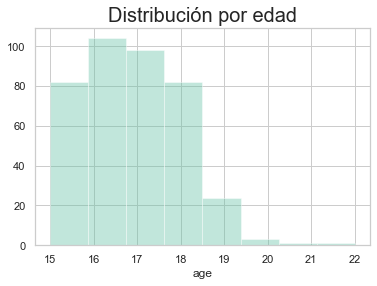

In [7]:
# distribución por edad
sns.distplot(math_df['age'], kde=False, bins=8)
plt.title('Distribución por edad', fontsize=20)
plt.show()

Vemos que la mayoría de estudiantes se encuentran en el rango de edad entre 15 y 18 años.

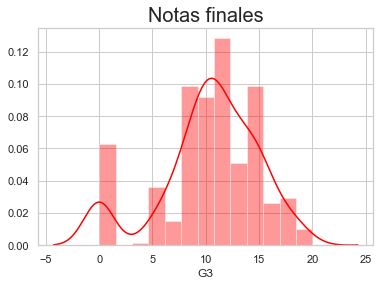

In [8]:
# distribución de notas finales
sns.distplot(math_df['G3'], color='red')
plt.title('Notas finales', fontsize=20)
plt.show()

Las notas pueden variar desde 0 hasta 20. Apreciamos cómo la mayoría de notas finales se mueven alrededor del 10 (sobre 20).

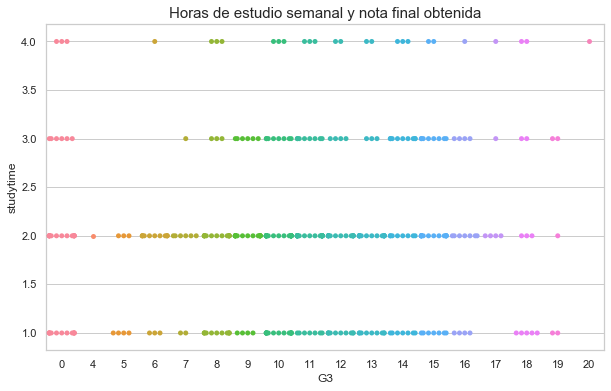

In [9]:
# ¿Cómo se relaciona el tiempo de estudio con la nota final?
plt.figure(figsize=(10,6))
sns.swarmplot(x='G3', y='studytime', data=math_df)
plt.title('Horas de estudio semanal y nota final obtenida', fontsize=15)
plt.show()

Lo primero que vemos aquí es que no parece haber una correlación entre el tiempo de estudio (horas/semana) y la nota final obtenida. La mayoría dedica entre 1 y 2 horas/semana a estudiar.

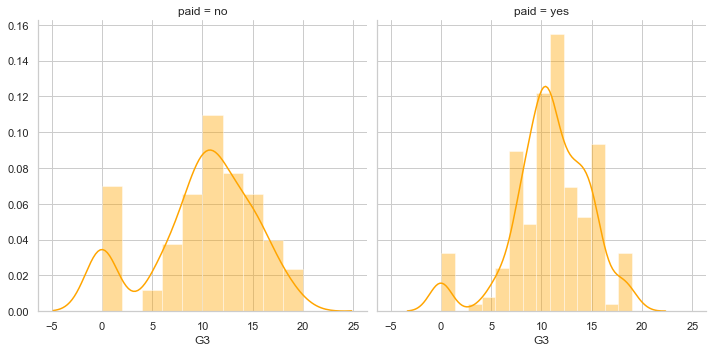

In [10]:
# ¿Sirven las clases particulares para mejorar la nota final?
g = sns.FacetGrid(math_df, col='paid', height=5)
g = g.map(sns.distplot, 'G3', color='orange')
plt.show()

Asistir a clases particulares parece ayudar a algunos estudiantes a mejorar las notas en matemáticas.

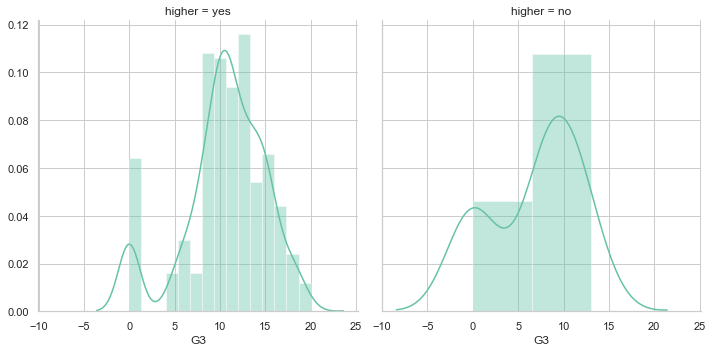

In [11]:
# ¿Aquellos con intención de hacer estudios superiores obtienen mejores notas?
g = sns.FacetGrid(math_df, col='higher', height=5)
g = g.map(sns.distplot, 'G3')
plt.show()

Definitivamente, sí. Los estudiantes con intención de llevar a cabo estudios superiores tras el instituto tienden a obtener notas más altas.

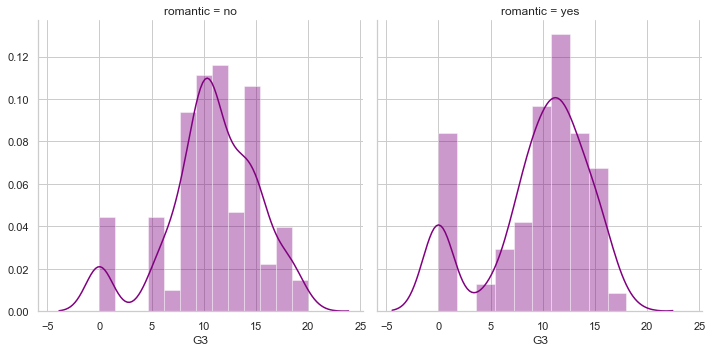

In [12]:
# Relación entre estar en una relación amorosa y notas finales obtenidas
g = sns.FacetGrid(math_df, col='romantic', height=5)
g = g.map(sns.distplot, 'G3', color='purple')
plt.show()

No parece que haya diferencia entre las notas obtenidas por aquellos estudiantes que tienen pareja y los que no.

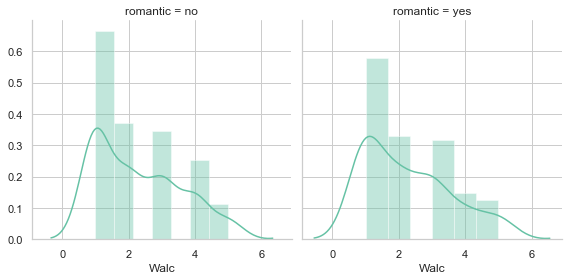

In [13]:
# ¿Relación amorosa y consumo de alcohol en fines de semana?
g = sns.FacetGrid(math_df, col='romantic', height=4)
g = g.map(sns.distplot, 'Walc')
plt.show()

Ni tampoco entre tener pareja o no y el consumo de alcohol en el fin de semana.

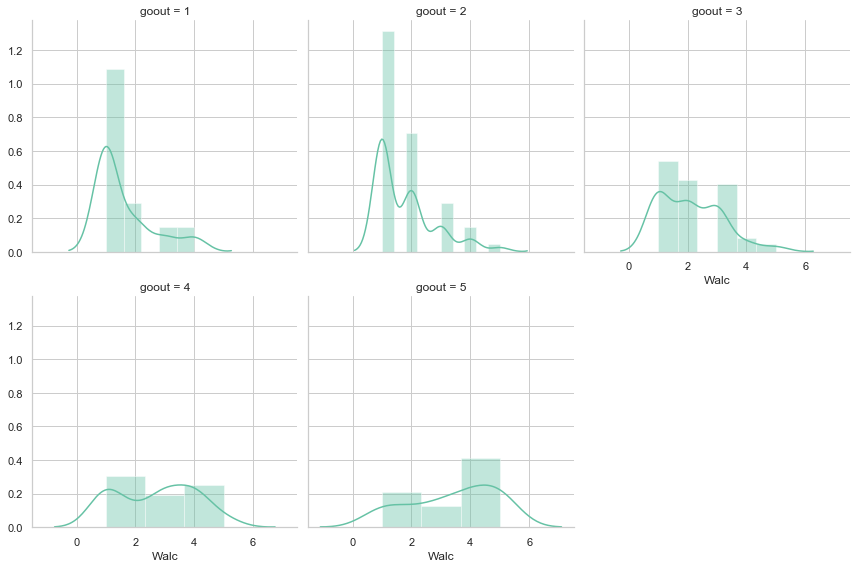

In [14]:
# Salir y beber
g = sns.FacetGrid(math_df, col='goout', height=4, col_wrap=3)
g = g.map(sns.distplot, 'Walc')
plt.show()

Aquellos que salen más, tienden a beber más.

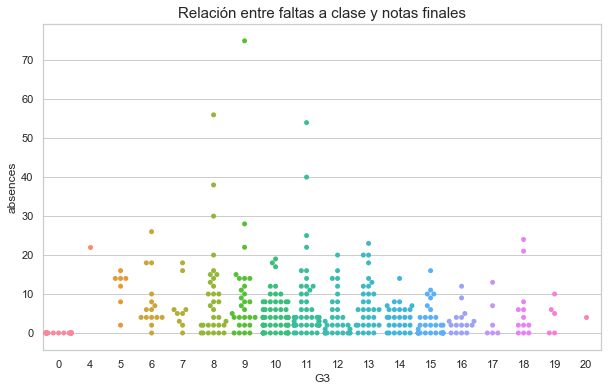

In [15]:
# Faltar a clase y notas finales
plt.figure(figsize=(10,6))
sns.swarmplot(x='G3', y='absences', data=math_df)
plt.title('Relación entre faltas a clase y notas finales', fontsize=15)
plt.show()

Sí, los estudiantes con más faltas a clase tienden a obtener notas finales más bajas.

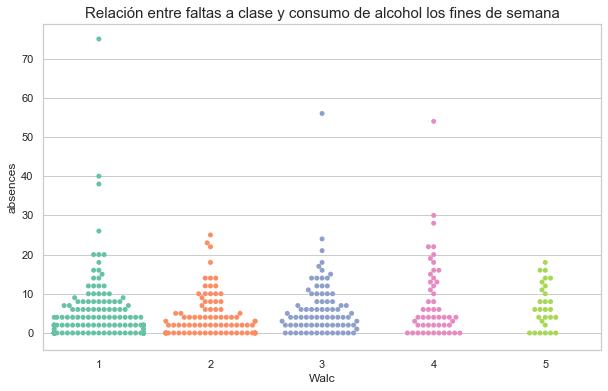

In [16]:
# Relación entre faltas a clase y consumo de alcohol
plt.figure(figsize=(10,6))
sns.swarmplot(x='Walc', y='absences', data=math_df)
plt.title('Relación entre faltas a clase y consumo de alcohol los fines de semana', fontsize=15)
plt.show()

No parece haber una relación entre faltar a clase y mayor consumo de alcohol en fines de semana.

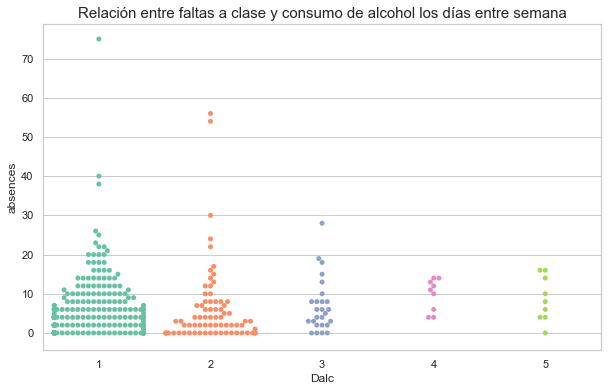

In [17]:
# Relación entre faltar a clase y consumo de alcohol entre semana
plt.figure(figsize=(10,6))
sns.swarmplot(x='Dalc', y='absences', data=math_df)
plt.title('Relación entre faltas a clase y consumo de alcohol los días entre semana', fontsize=15)
plt.show()

Ni tampoco entre faltar a clase y consumo de alcohol los días entre semana.

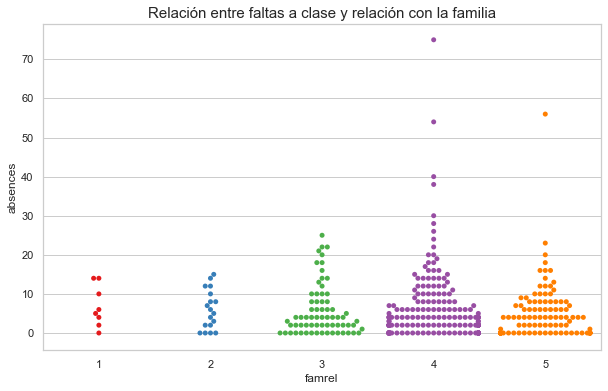

In [18]:
# Relación entre ausencias a clase y relación con la familia
plt.figure(figsize=(10,6))
sns.swarmplot(x='famrel', y='absences', data=math_df, palette='Set1')
plt.title('Relación entre faltas a clase y relación con la familia', fontsize=15)
plt.show()

La mayoría percibe una buena o muy buena relación con su familia. Aunque algunas faltas a clase aparecen en estudiantes con mejor relación familiar, podríamos seguramente atribuirlo a la mayor concentración en estos grupos y, por consiguiente, mayor probabilidad de encontrar estudiantes que falten más.

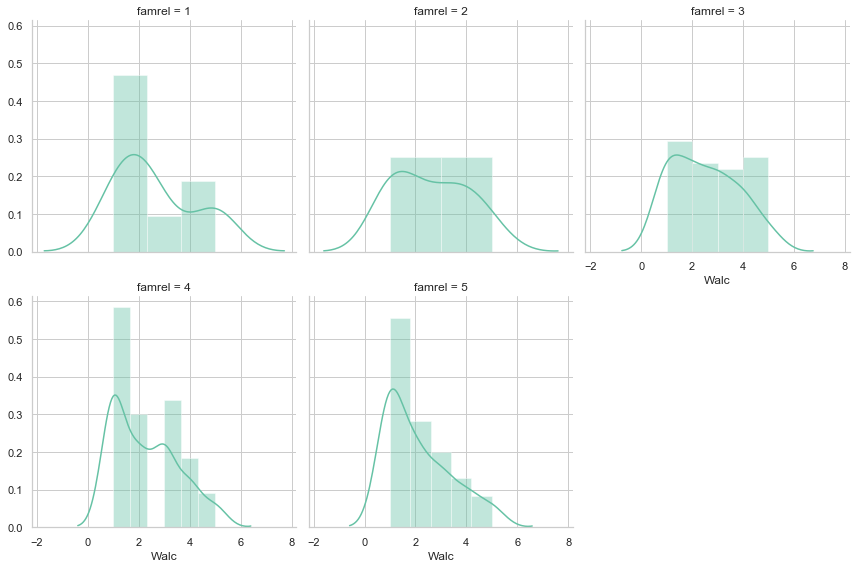

In [19]:
# Relación entre consumo de alcohol y calidad percibida de la relación con la familia
g = sns.FacetGrid(math_df, col='famrel', height=4, col_wrap=3)
g = g.map(sns.distplot, 'Walc')
plt.show()

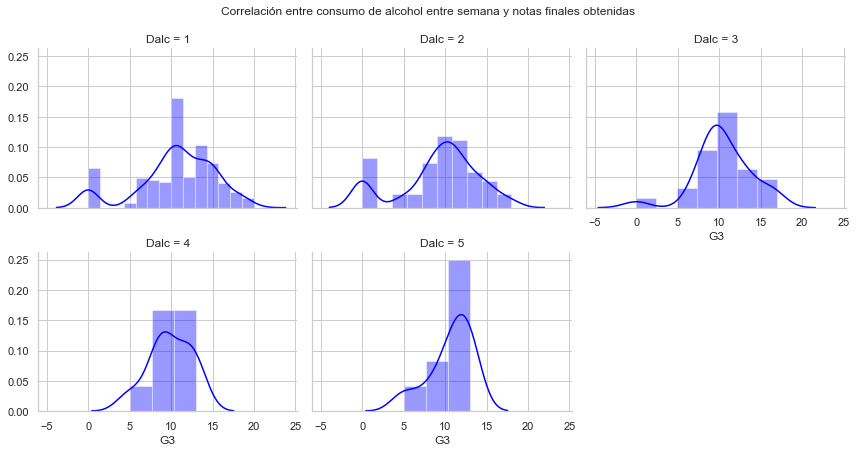

In [20]:
# Relación entre consumo de alcohol entre semana y nota final
g = sns.FacetGrid(math_df, col='Dalc', height=4, col_wrap=3)
g = g.map(sns.distplot, 'G3', color='blue')
plt.suptitle('Correlación entre consumo de alcohol entre semana y notas finales obtenidas')
plt.tight_layout(rect=[0,0.2,1,0.95])
plt.show()

Podemos ver una relación entre el consumo de alcohol entre semana y las notas finales obtenidas. A medida que el consumo de alcohol aumenta, las notas se concentran más en torno a la media y no encontramos notas finales altas.

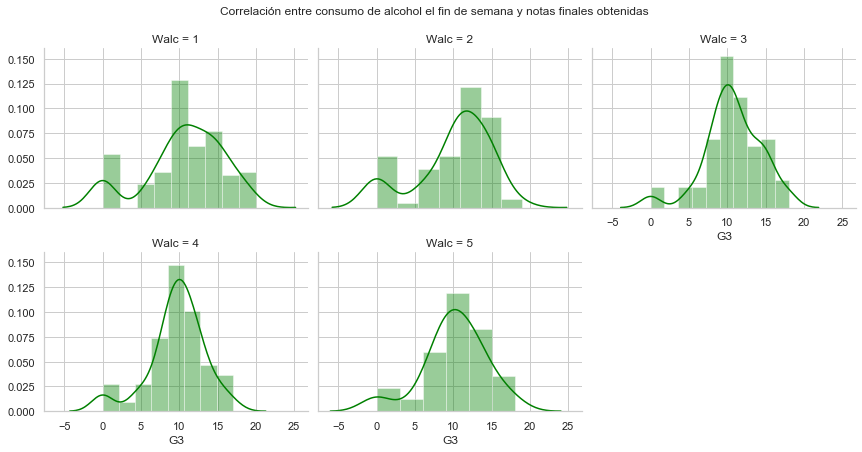

In [21]:
# Relación entre consumo de alcohol los fines de semana y nota final
g = sns.FacetGrid(math_df, col='Walc', height=4, col_wrap=3)
g = g.map(sns.distplot, 'G3', color='green')
plt.suptitle('Correlación entre consumo de alcohol el fin de semana y notas finales obtenidas')
plt.tight_layout(rect=[0,0.2,1,0.95])
plt.show()

Sin embargo, no parece que el consumo de alcohol en fines de semana afecte a las notas finales obtenidas.

## Modelo de predicción de nota final en matemáticas (G3)

### Primera aproximación - Regresión Lineal

In [22]:
# target
y = math_df['G3']

In [23]:
# en principio, simplificamos seleccionando solo variables numéricas
numeric_cols = [cname for cname in math_df.columns if math_df[cname].dtype in ['int64']]
X = math_df[numeric_cols]
X = X.drop(['G3'], axis=1)

In [24]:
# revisamos las variables independientes
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10


In [25]:
# definimos el modelo
math_model = LinearRegression()

In [26]:
# fit model
math_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# predictions
predictions = math_model.predict(X)

In [28]:
# calculamos la bondad del modelo
val_mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('MAE:', val_mae)
print('R2:', r2)
print('R2 ajustado:', adjusted_r2)

MAE: 1.1696509241269821
R2: 0.8378147296769527
R2 ajustado: 0.8313957875797344


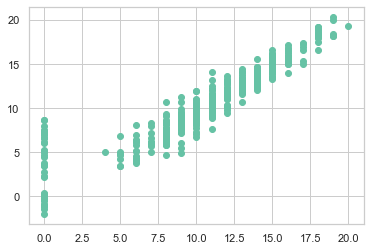

In [29]:
# gráficamente
plt.scatter(y, predictions)
plt.show()

### Segunda aproximación

In [30]:
# dividimos entre train y validation
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)

In [31]:
# definimos el modelo
math_model = LinearRegression()

# entrenamos el modelo con el train
math_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# predecimos con validación
val_predictions = math_model.predict(val_X)

In [33]:
print('Algunos de los valores predichos:', val_predictions[:6])
print('Algunos de los valores reales:', val_y[:6])

Algunos de los valores predichos: [ 5.18881461 10.13380809  6.36296794  9.0030338   9.69801293 11.39487793]
Algunos de los valores reales: 146     0
379    10
247     8
197    10
368    10
165    12
Name: G3, dtype: int64


In [34]:
# calculando el mae
val_mae = mean_absolute_error(val_y, val_predictions)

# calculando el coeficiente de determinación
r2 = r2_score(val_y, val_predictions)

# calculando el R2 ajustado
n = train_X.shape[0]
p = train_X.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('MAE:', val_mae)
print('R2:', r2)
print('R2 ajustado:', adjusted_r2)

MAE: 1.2434365641953768
R2: 0.782098530640123
R2 ajustado: 0.7704252376387011


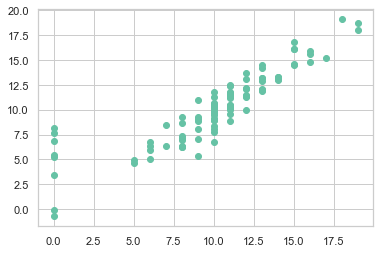

In [35]:
# gráficamente
plt.scatter(val_y, val_predictions)
plt.show()

### Probando con Cross Validation

In [36]:
# cross validation
scores = -1 * cross_val_score(math_model, X, y,
                             cv=5,
                             scoring = 'neg_mean_absolute_error')
        
print('Cross validation score:', scores.mean())

Cross validation score: 1.2329835671562868


In [37]:
scores

array([1.02891293, 1.13789994, 1.35583267, 1.21683938, 1.42543291])

In [38]:
math_model.intercept_

-1.0861591906299974

In [39]:
math_model.coef_

array([-0.18900651,  0.18900861, -0.08009969,  0.18297383, -0.11383385,
       -0.17939044,  0.3108292 ,  0.07245807,  0.0900115 , -0.12077715,
        0.11210155,  0.07325936,  0.03395123,  0.15088542,  0.97711577])

El último peso corresponde a la variable G2, que es la nota intermedia del curso. Vemos un mayor peso de ella que de las demás variables, lo cual nos puede hacer pensar que el resto de variables no están contribuyendo al modelo o lo hacen muy poco a la hora de ayudarnos a predecir la nota final.

### Primera aproximación - Random Forest Regressor

In [40]:
rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X,train_y)

predictions = rf_model.predict(val_X)

In [41]:
# vemos el MAE
rf_val_mae = mean_absolute_error(val_y, predictions)

# coeficiente de determinación
r2 = r2_score(val_y, predictions)

# calculando el R2 ajustado
n = train_X.shape[0]
p = train_X.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('MAE:', rf_val_mae)
print('R2:', r2)
print('R2 ajustado:', adjusted_r2)

MAE: 1.055959595959596
R2: 0.8374177597722545
R2 ajustado: 0.828707996902911


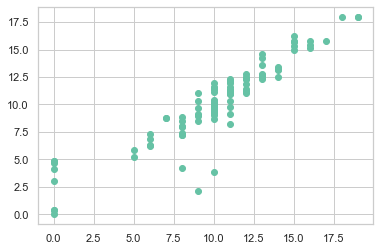

In [42]:
# gráficamente
plt.scatter(val_y, predictions)
plt.show()

### Jugando con el número de árboles del Random Forest

In [43]:
# defino una función para probar diferentes n_estimators en el random forest
def get_best_mae(estimators, train_1, train_2, valid):
    
    rf_model = RandomForestRegressor(n_estimators=estimators, random_state=1)
    rf_model.fit(train_1,train_2)
    predictions = rf_model.predict(valid)
    val_mae = mean_absolute_error(val_y,predictions)
    
    return print(val_mae)

In [44]:
result = {}

for i in range(2000,3000,100):
    result[i] = get_best_mae(i,train_X,train_y,val_X)
    
print(result)

1.0278686868686868
1.0278884078884079
1.0275390266299356
1.027562582345191
1.0271548821548822
1.0270868686868688
1.0272183372183372
1.0279461279461277
1.0284307359307359
1.0282897944966911
{2000: None, 2100: None, 2200: None, 2300: None, 2400: None, 2500: None, 2600: None, 2700: None, 2800: None, 2900: None}


Vemos diferentes MAE para diferente número de árboles en el modelo. El menor error posible es el que buscamos.

### Segunda aproximación (incluyendo las variables categóricas)

In [45]:
# vuelvo a asignar x e y para codificar las variables categóricas
y = math_df['G3']

X = math_df.drop(['G3'], axis=1)

In [46]:
object_cols = [col for col in math_df.columns if math_df[col].dtype == 'object']

In [47]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)

In [48]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[object_cols]))

# volvemos a poner el índice 
OH_cols_train.index = train_X.index
OH_cols_valid.index = val_X.index

# eliminamos las columnas categóricas existentes antes de incluirles las codificadas
num_X_train = train_X.drop(object_cols, axis=1)
num_X_valid = val_X.drop(object_cols, axis=1)

# añadimos las del one-hot encoding
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [49]:
OH_results = {}

for i in range(2000,3000,100):
    OH_results[i] = get_best_mae(i,OH_X_train,train_y,OH_X_valid)
    
print(OH_results)

1.0226919191919193
1.0210389610389612
1.0204132231404959
1.020386473429952
1.020686026936027
1.0212484848484848
1.0206099456099456
1.0214665170220727
1.022049062049062
1.0225635667014976
{2000: None, 2100: None, 2200: None, 2300: None, 2400: None, 2500: None, 2600: None, 2700: None, 2800: None, 2900: None}


Apenas existe mejora en el MAE después de codificar las variables categóricas e incluirlas en nuestro modelo.

In [50]:
# coeficiente de determinación
r2 = r2_score(val_y, predictions)

# coeficiente de determinación ajustado
n = OH_X_train.shape[0]
p = OH_X_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('R2:', r2)
print('R2 ajustado:', adjusted_r2)

R2: 0.8374177597722545
R2 ajustado: 0.7976297009823421


Obtenemos R2 ajustado menor que si no incluimos las variables categóricas, penalizándonos porque son variables que no mejoran el poder predictivo del modelo.

### ¿Qué ocurre si construimos el modelo sin incluir las variables de notas intermedias? (G1 y G2)

In [51]:
# target
y = math_df['G3']

# features
X = math_df.drop(['G1', 'G2', 'G3'], axis=1)

# get dummies
X = pd.get_dummies(X)

In [52]:
# train-test split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [53]:
# definimos el modelo
rf_model_2 = RandomForestRegressor()

# entrenamos el modelo
rf_model_2.fit(train_X, train_y)

# predecimos
pred = rf_model_2.predict(val_X)

In [54]:
# puntuaciones
val_mae = mean_absolute_error(val_y, pred)
r2 = r2_score(val_y, pred)

n = train_X.shape[0]
p = train_X.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('MAE:', val_mae)
print('R2:', r2)
print('R2 ajustado:', adjusted_r2)

MAE: 2.5552525252525253
R2: 0.1945366527975475
R2 ajustado: 0.005808839227098295


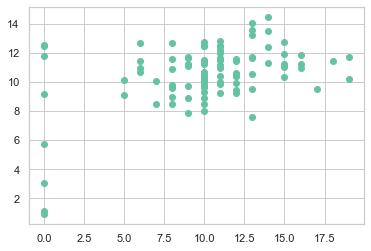

In [55]:
# gráficamente
plt.scatter(val_y, pred)
plt.show()

Como decíamos más arriba, la variable de la nota intermedia es la que predice casi todo en el modelo. Al eliminarla, vemos un resultado muy malo, debido a que el resto de variables apenas son capaces de predecir la nota final. El coeficiente de determinación ajustado es cercano a cero, confirmándonos que las variables explicativas usadas son insignificantes. Podemos verlo también gráficamente.